In [1]:
import pandas as pd
import sys
import matplotlib
matplotlib.rcParams['font.family'] = "IPAGothic"
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

df = pd.read_csv("./datas/jokyo20201129.csv", encoding="SHIFT-JIS")
cities =["さいたま市", "川越市", "熊谷市", "川口市", "行田市", "秩父市", "所沢市", "飯能市", "加須市", "本庄市", 
         "東松山市", "春日部市", "狭山市", "羽生市", "鴻巣市", "深谷市", "上尾市", "草加市", "越谷市", "蕨市", 
         "戸田市", "入間市", "朝霞市", "志木市", "和光市", "新座市", "桶川市", "久喜市", "北本市", "八潮市", 
         "富士見市", "三郷市", "蓮田市", "坂戸市", "幸手市","鶴ヶ島市", "日高市", "吉川市", "ふじみ野市", 
         "白岡市", "伊奈町", "三芳町", "毛呂山町", "越生町", "滑川町", "嵐山町", "小川町", "川島町", "吉見町", 
         "鳩山町", "ときがわ町", "横瀬町", "皆野町","長瀞町", "小鹿野町", "東秩父村", "美里町", "神川町", "上里町", "寄居町", "宮代町", "杉戸町", "松伏町"]

In [2]:
df

,NO.,判明日,年代,性別,居住地
0,1,2020/2/1,30代,男性,埼玉県外
1,2,2020/2/10,40代,男性,埼玉県
2,3,2020/2/14,-,-,埼玉県外
3,4,2020/2/21,未就学児,男性,埼玉県
4,5,2020/3/5,60代,男性,行田市
...,...,...,...,...,...
8376,8377,2020/11/28,50代,男性,さいたま市
8377,8378,2020/11/28,50代,男性,さいたま市
8378,8379,2020/11/28,50代,女性,さいたま市
8379,8380,2020/11/28,60代,男性,さいたま市


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8381 entries, 0 to 8380
Data columns (total 5 columns):
NO.    8381 non-null int64
判明日    8375 non-null object
年代     8326 non-null object
性別     8356 non-null object
居住地    8278 non-null object
dtypes: int64(1), object(4)
memory usage: 327.5+ KB


各市町村の陽性者数

In [4]:
import numpy as np

pattern = '|'.join(cities)
residence_ser = df["居住地"][df["居住地"].str.contains(pattern).astype("bool")]

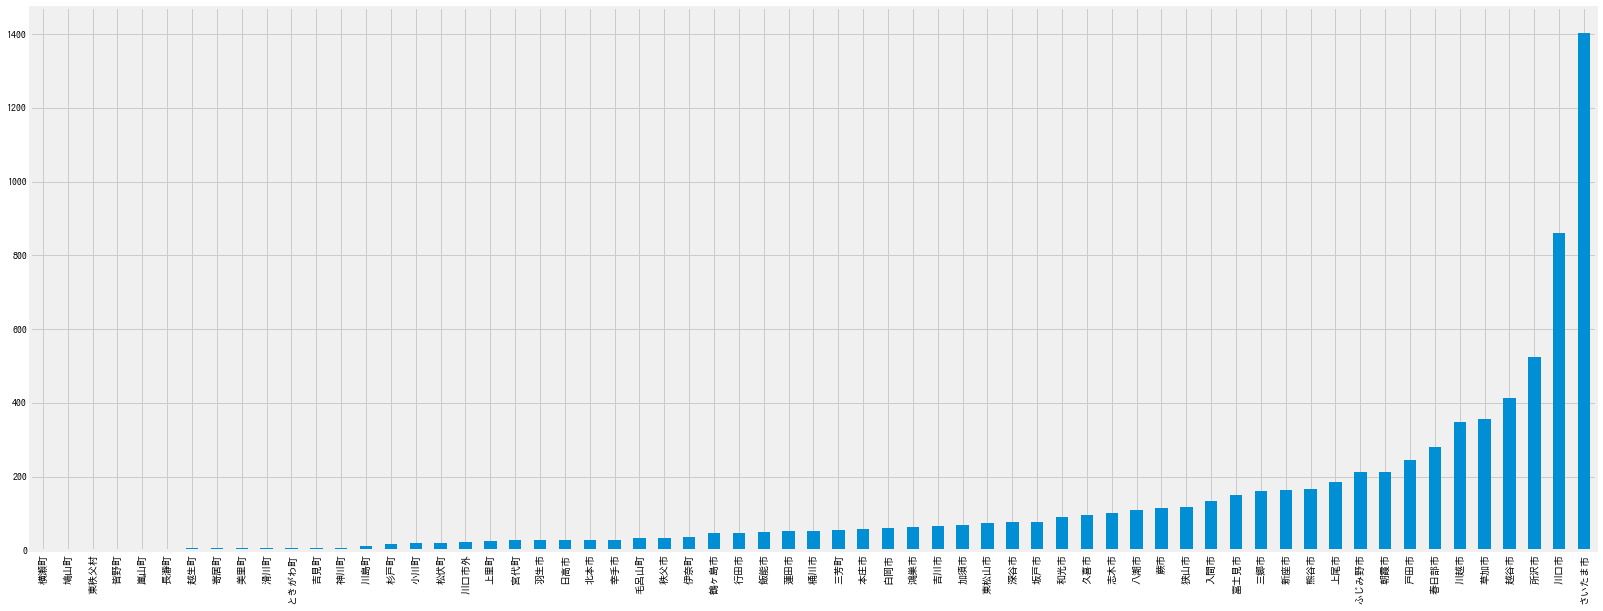

In [5]:
labels = range(len(list(set(residence_ser.tolist()))))
bins = np.array(labels) - 0.5
residence_ser = residence_ser.value_counts().sort_values()
residence_ser.plot(kind="bar", align="center", figsize=(25, 10))

# 感染者数の推移

## 県内全体

In [6]:
pd.to_datetime(df["判明日"], format="%Y/%m/%d", errors='coerce')

0      2020-02-01
1      2020-02-10
2      2020-02-14
3      2020-02-21
4      2020-03-05
          ...    
8376   2020-11-28
8377   2020-11-28
8378   2020-11-28
8379   2020-11-28
8380   2020-11-28
Name: 判明日, Length: 8381, dtype: datetime64[ns]

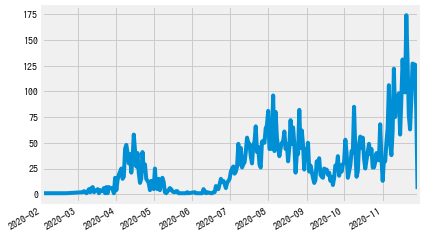

In [7]:
# 感染者数
df["判明日"] = pd.to_datetime(df["判明日"], format="%Y/%m/%d", errors='coerce')
df["判明日"].value_counts().sort_index().plot()

## 市町村毎の感染者数の推移

In [8]:
# 判明日の初日から取り出して本日までの日付indexを作成する
import datetime

firstday = df["判明日"][0]
endday = df["判明日"][len(df)-1]

days = [firstday]
new_day = firstday
while True:
    new_day = new_day + datetime.timedelta(days=1)
    days.append(new_day)
    if new_day == endday:
        break

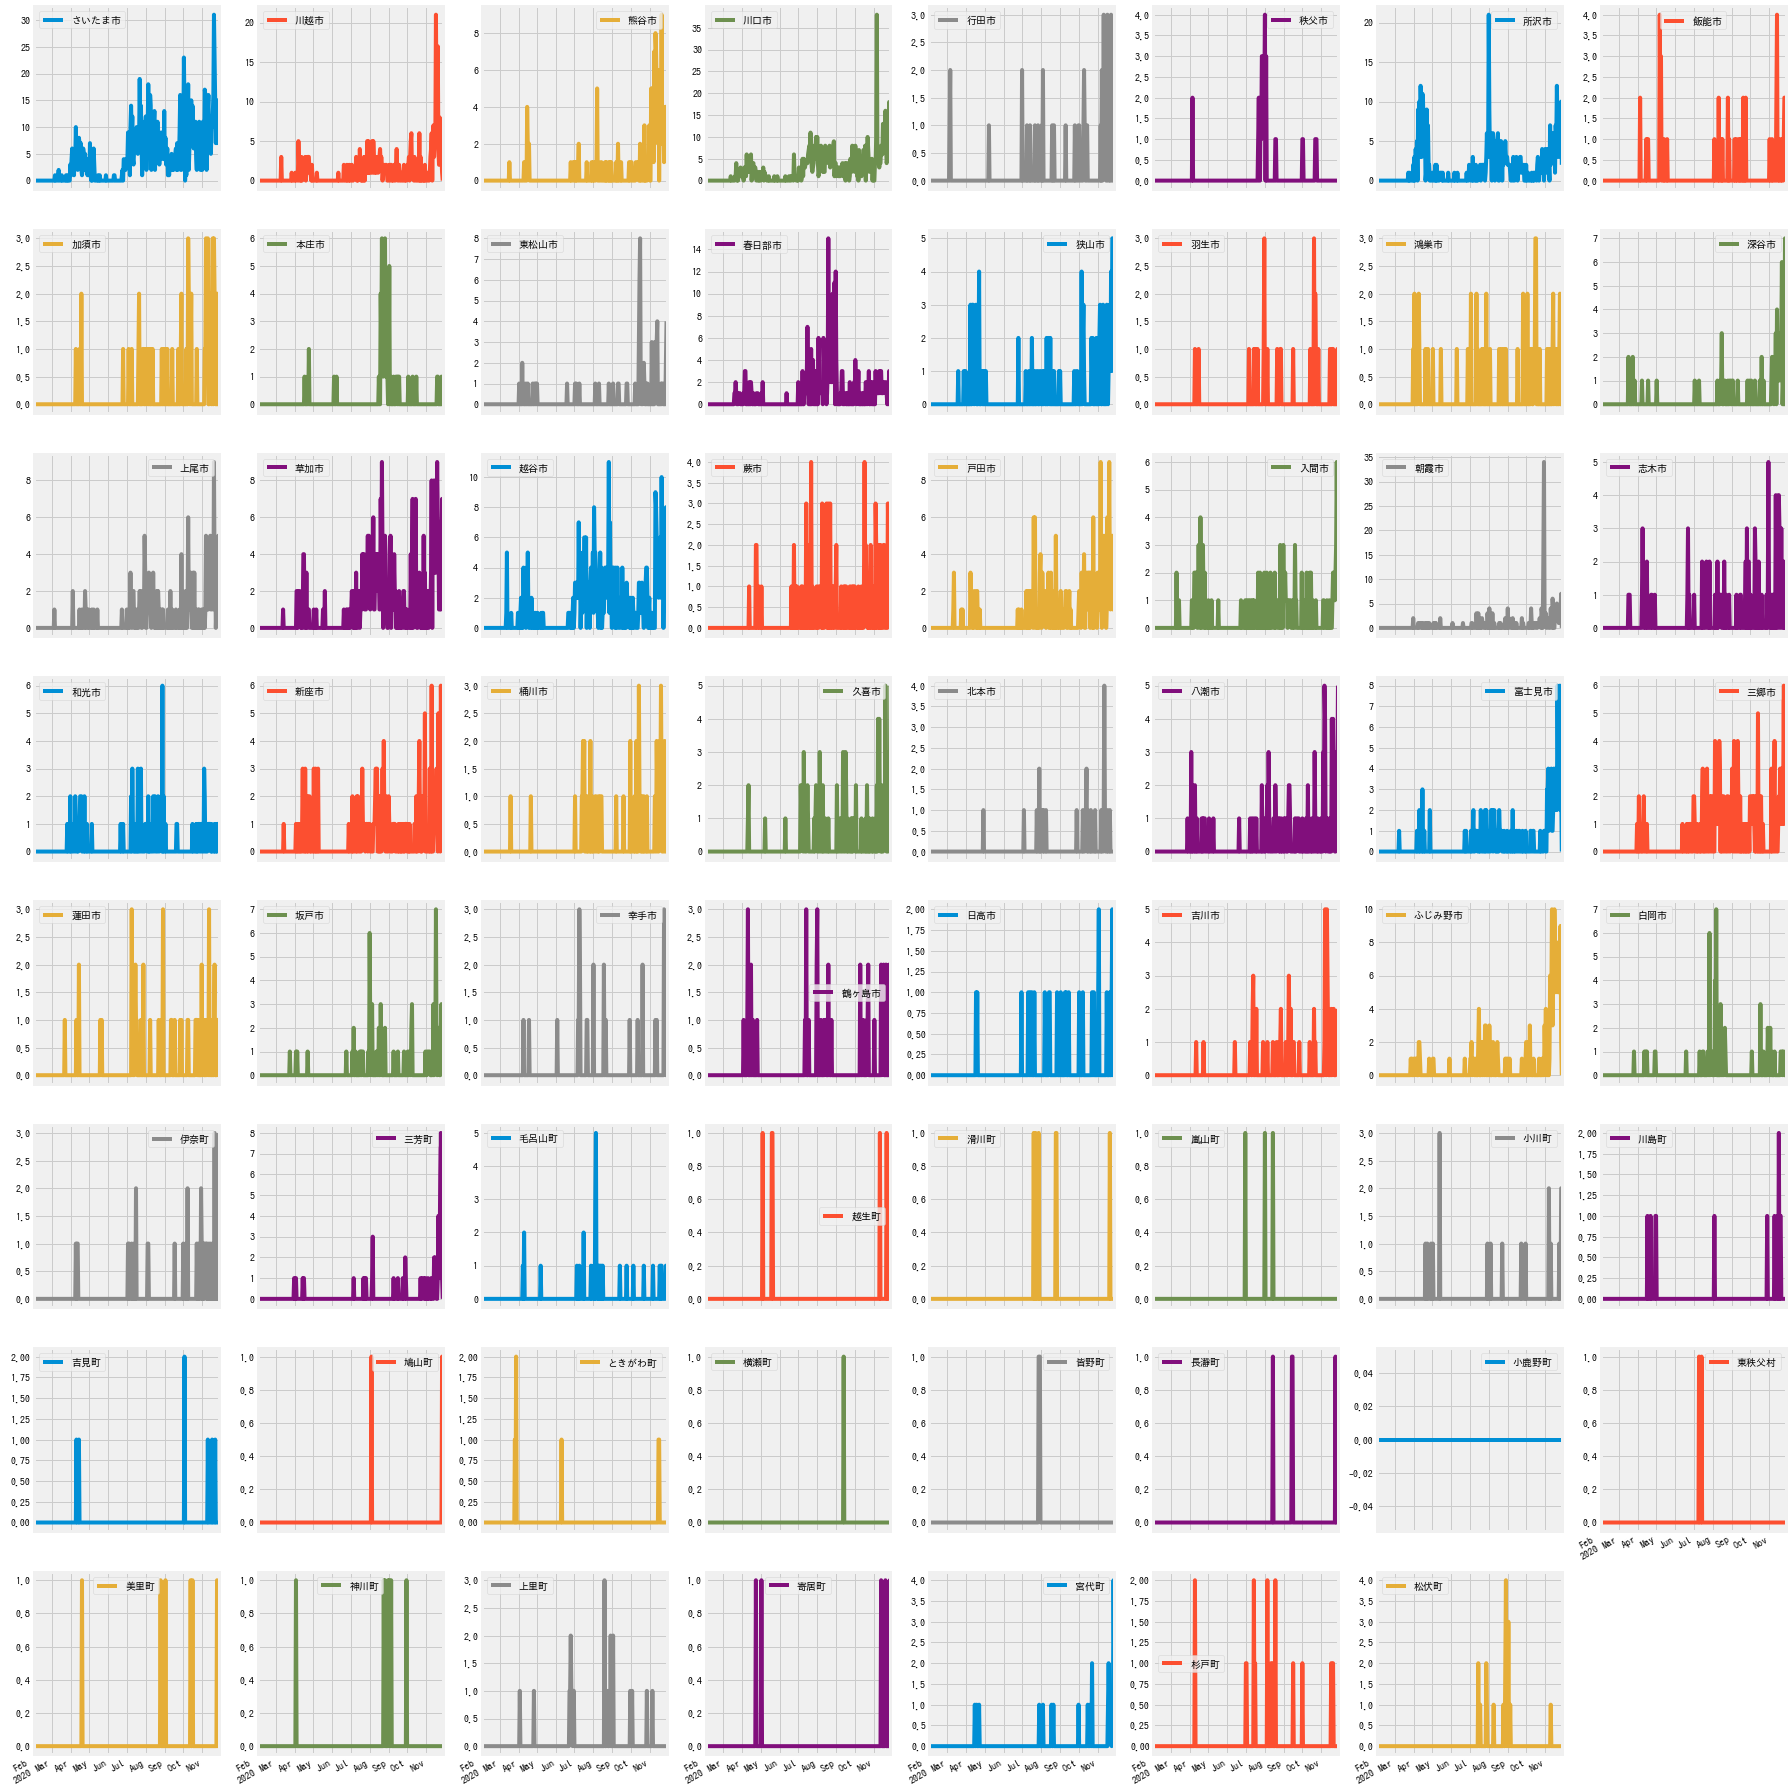

In [9]:
all_saitama = df["判明日"].value_counts()
yousei_num_df = pd.DataFrame(all_saitama,index=days)
yousei_num_df = yousei_num_df.rename(columns={"判明日": "さいたま市"}).fillna(0)

for city in cities:
    yousei_num_city = df[df["居住地"]==city]["判明日"].value_counts()
    yousei_num_df[city] = yousei_num_city

yousei_num_df = yousei_num_df.fillna(0)

yousei_num_df.plot(subplots=True,layout=(8,8), figsize=(25, 25))

plt.tight_layout()
plt.show()